# ***ONLINE SHOPPERS INTENTION PREDICTION***

# Problem Statement - 

The main objective revolved around the identification of key metrics which contributes the most towards predicting a shopper's behavior and to suggest prioritized critical recommendations and performance improvements on the same. Revenue is the attribute of interest which identifies if a purchase was made or not.

# ***List of Python Libraries used for this particular project -***

In [163]:
from warnings import filterwarnings
filterwarnings("ignore")
from os import chdir
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mlp
from numpy import unique
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ***1)Read the Data-***

In [2]:
chdir("F:/Raw Datasets/Online Shoppers Intention")
data = pd.read_csv("online_shoppers_intention.csv")

In [3]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# ***2) Data Profiling-***

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# ***3) Seperation of data into categorical and numerical data-***

**Converting continuous columns into categorical-**

In [7]:
data["SpecialDay"] = data["SpecialDay"].astype(object)
data["OperatingSystems"] = data["OperatingSystems"].astype(object)
data["Browser"] = data["Browser"].astype(object)
data["Region"] = data["Region"].astype(object)
data["TrafficType"] = data["TrafficType"].astype(object)
data["Weekend"] = data["Weekend"].astype(object)
data["Revenue"] = data["Revenue"].astype(object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [9]:
cat = []
con = []

for i in data.columns:
    if(data[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [10]:
cat

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [11]:
con

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

# ***PREPROCESSING -*** 

# ***4) Identifying Outliers/Anomalies and Eliminating them if any-***

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_std = pd.DataFrame(ss.fit_transform(data[con]),columns=con)

In [13]:
rows_tobe_dropped = []

for i in con:
    out = list(data_std[(data_std[i]>3)|(data_std[i]<-3)].index)
    rows_tobe_dropped.extend(out)
    
from numpy import unique
Outliers = unique(rows_tobe_dropped)

In [14]:
len(Outliers)

1869

In [15]:
Outliers

array([    0,     2,     6, ..., 12312, 12313, 12321])

In [16]:
data = data.drop(index=Outliers,axis=0)

In [17]:
data.shape

(10461, 18)

In [18]:
data.index = range(0,len(data),1)

In [19]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
2,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
3,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
4,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
10457,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
10458,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
10459,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# ***5)Exploratory Data Analysis***

**Univariate Analysis -Categorical Parameters**

In [20]:
cat

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

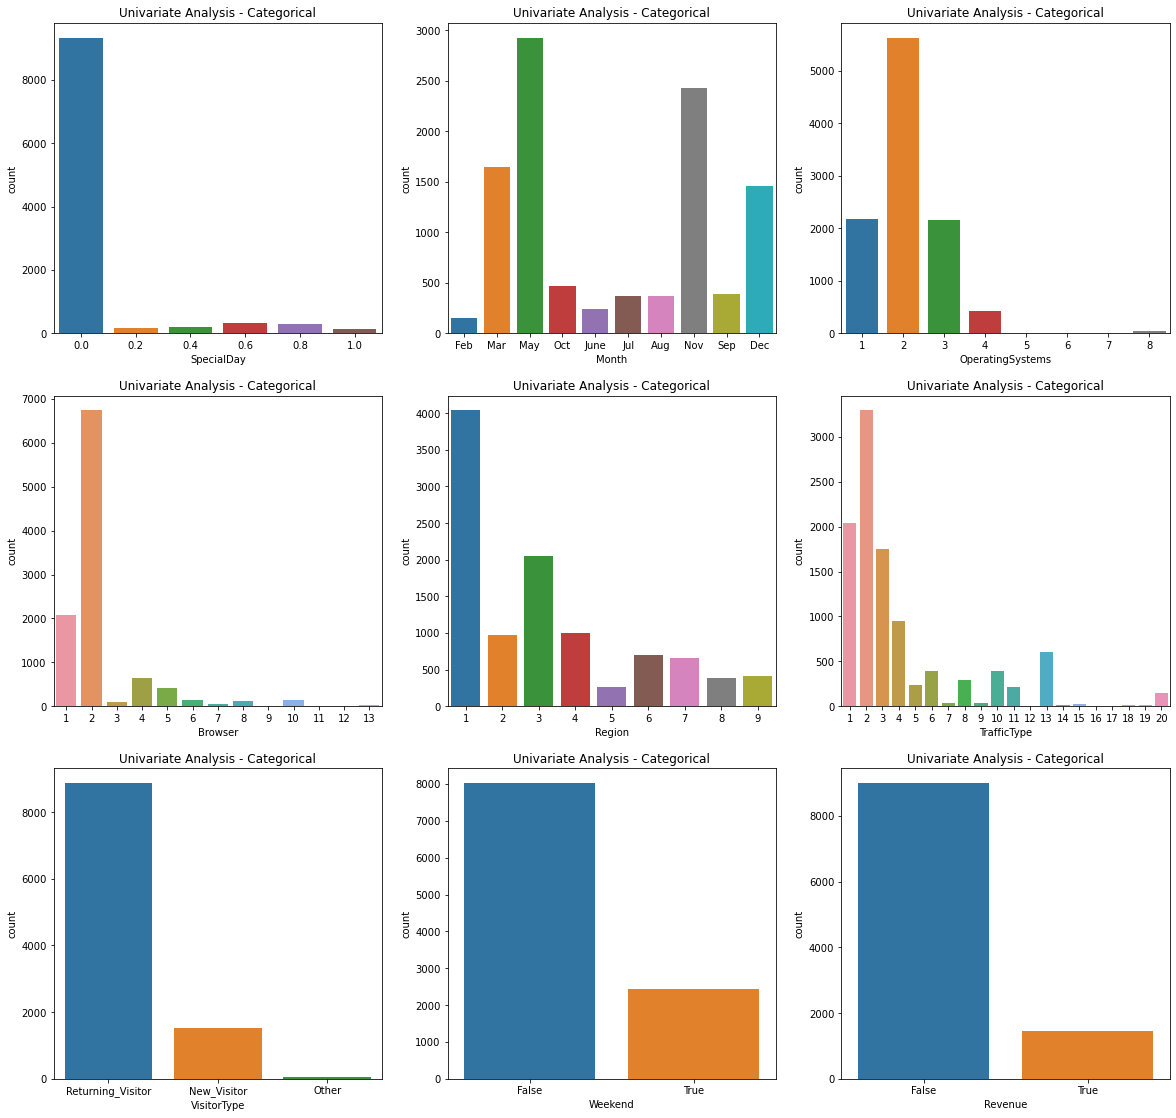

In [21]:
mlp.figure(figsize=(20,40))
x = 1
for i in cat:
    mlp.subplot(6,3,x)
    sb.countplot(data[i])
    x = x + 1
    mlp.title("Univariate Analysis - Categorical")

**Univariate Analysis - Numerical or Continuous Parameters**

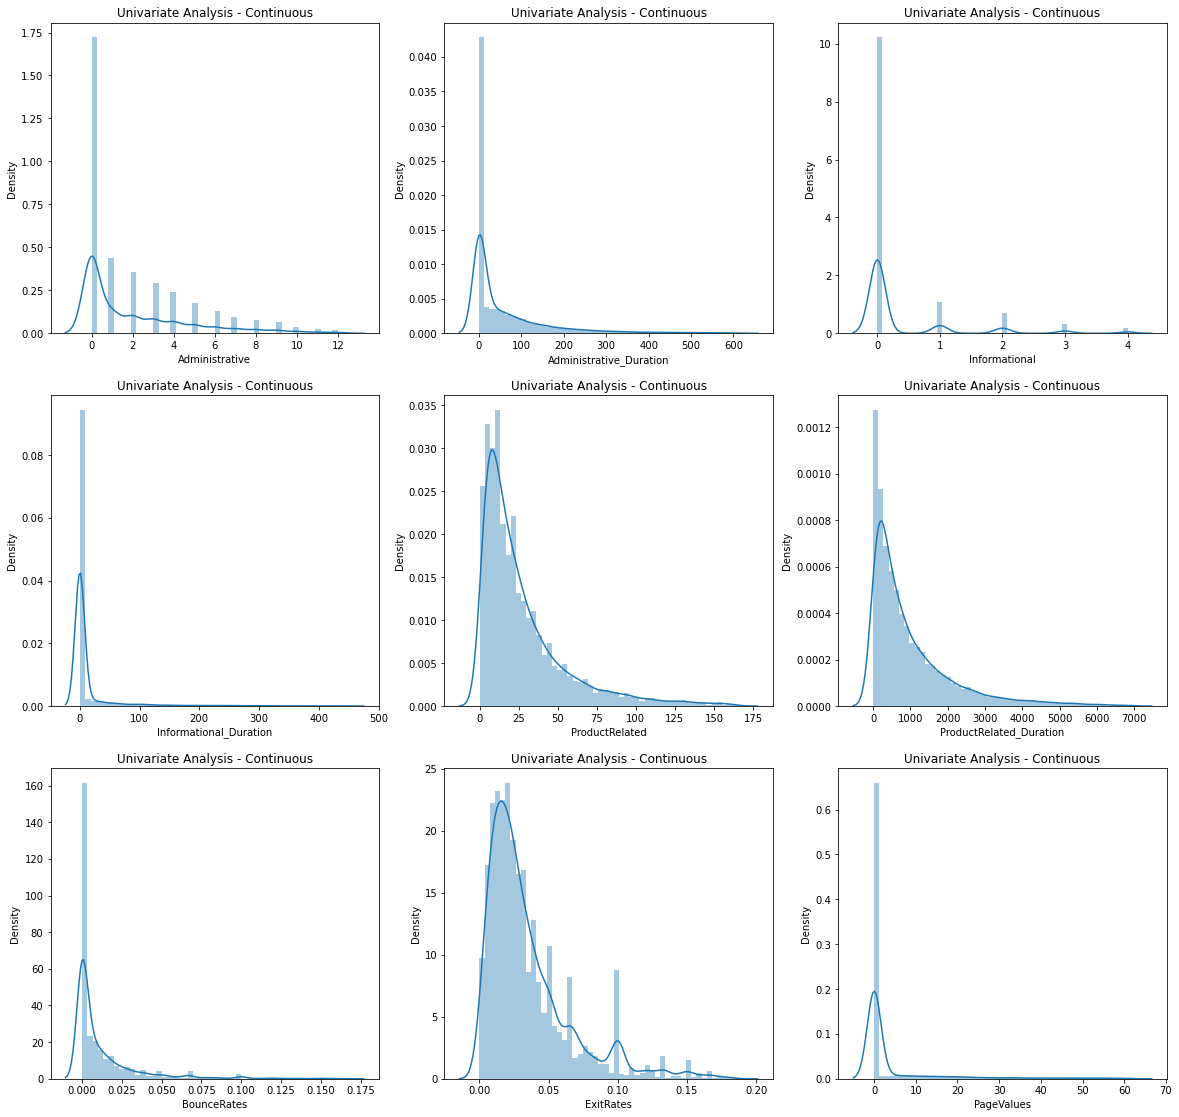

In [22]:
mlp.figure(figsize=(20,40))
x = 1
for i in con:
    mlp.subplot(6,3,x)
    sb.distplot(data[i])
    x = x + 1
    mlp.title("Univariate Analysis - Continuous")

**Skewness in Data -**

In [23]:
data[con].skew()

Administrative             1.477912
Administrative_Duration    2.426817
Informational              2.703991
Informational_Duration     4.802079
ProductRelated             2.008502
ProductRelated_Duration    2.029399
BounceRates                3.063261
ExitRates                  1.785613
PageValues                 3.196402
dtype: float64

**Bivariate Analysis - Categorical Parameters**

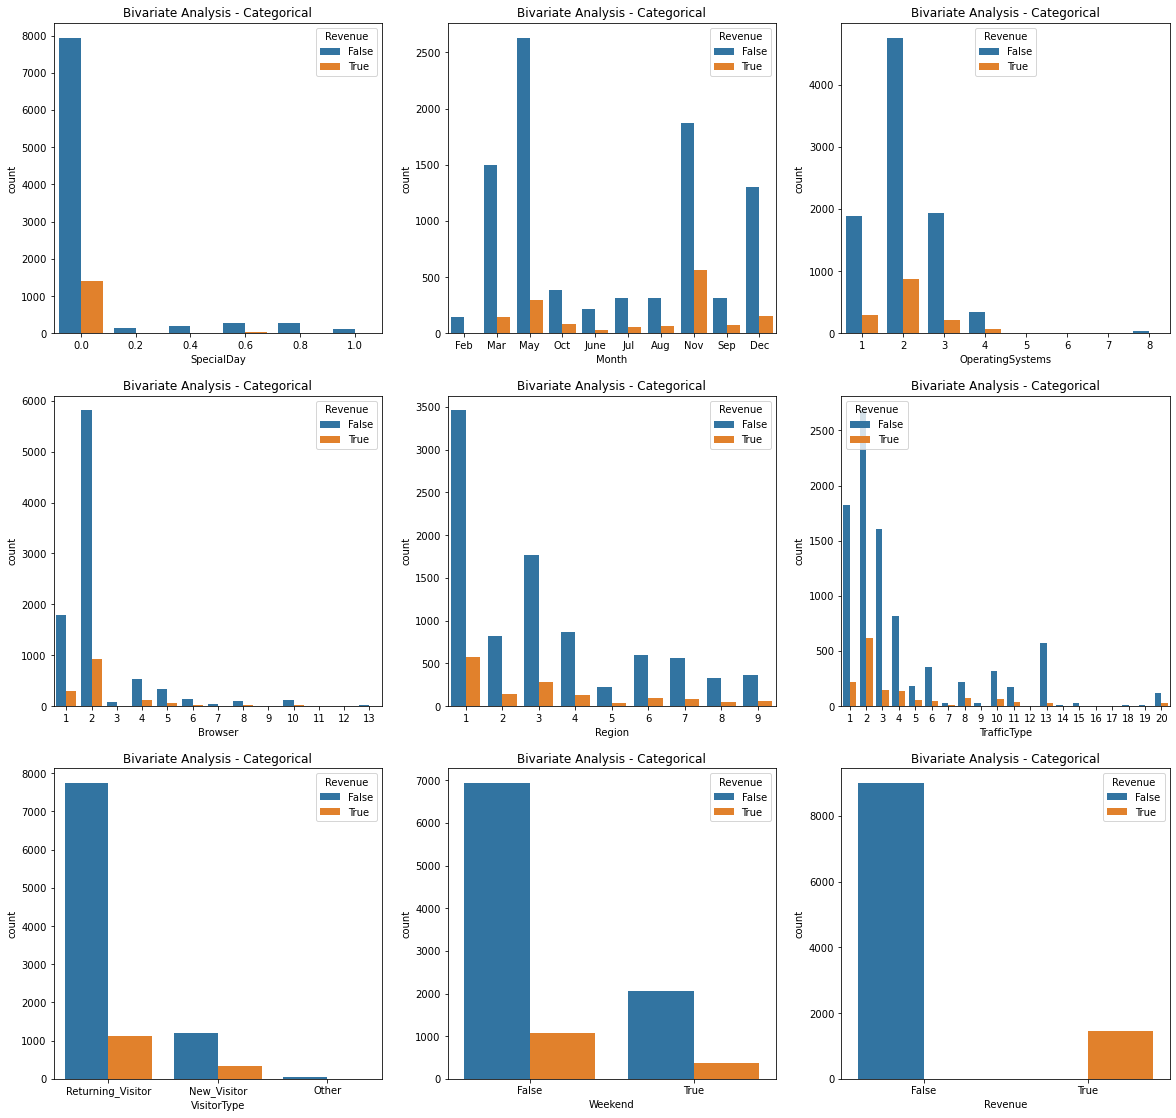

In [24]:
mlp.figure(figsize=(20,40))
x = 1
for i in cat:
    mlp.subplot(6,3,x)
    sb.countplot(data[i],hue=data["Revenue"])
    x = x + 1
    mlp.title("Bivariate Analysis - Categorical")

**Bivariate Analysis - Continuous Parameters**

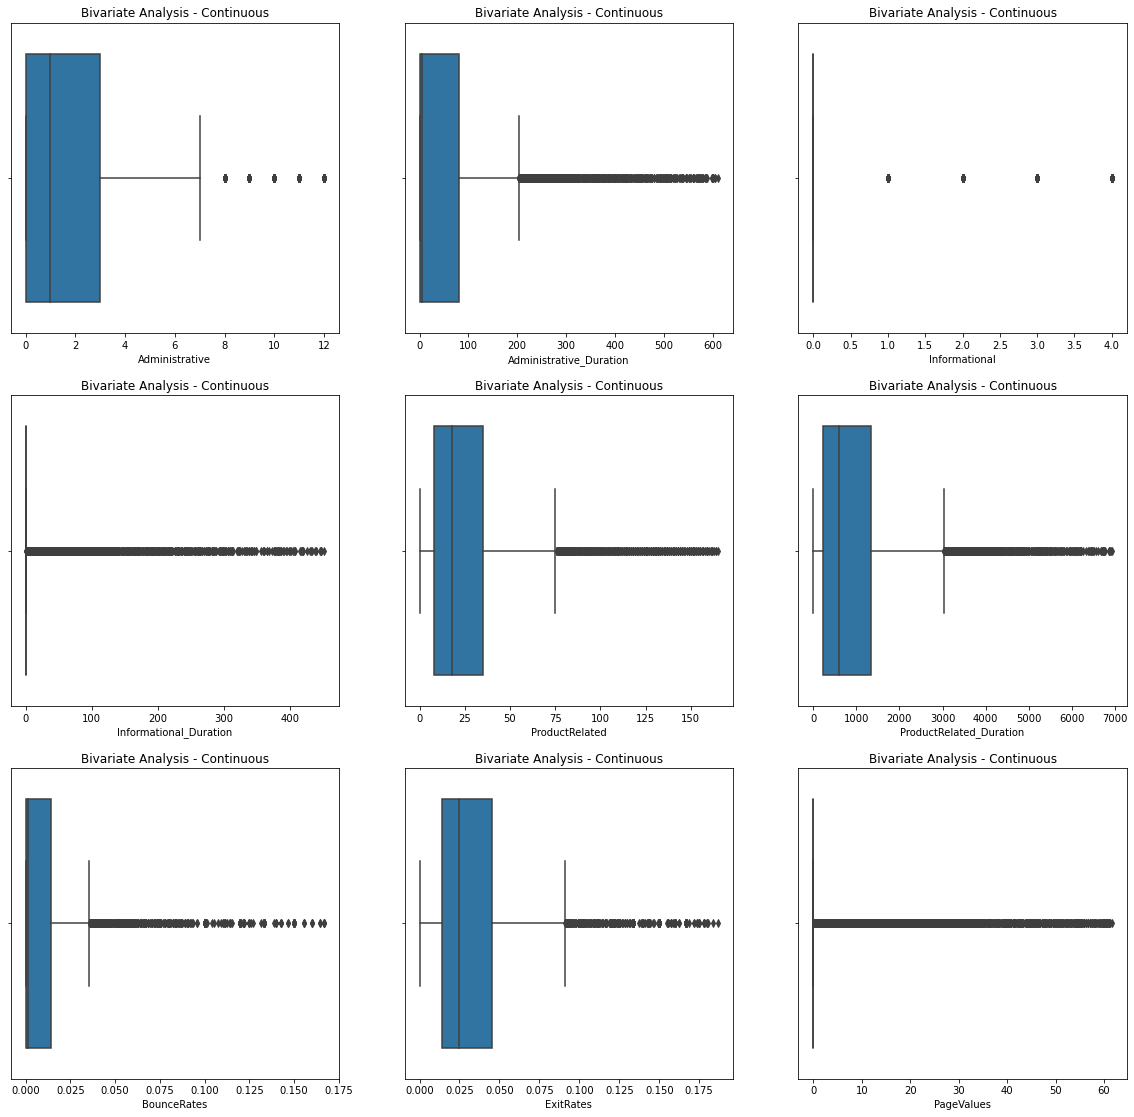

In [25]:
mlp.figure(figsize=(20,40))
x = 1
for i in con:
    mlp.subplot(6,3,x)
    sb.boxplot(data[i],hue=data["Revenue"])
    x = x + 1
    mlp.title("Bivariate Analysis - Continuous")

**Bivariate Analysis - Categorical Parameters using Chi-square Test -**

In [26]:
cat

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

*1) ChiSquare Test between SpecialDay and Revenue-*

In [27]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["SpecialDay"],data["Revenue"]))
chisq

(64.19357863292775,
 1.6471431226629976e-12,
 5,
 array([[8030.20361342, 1309.79638658],
        [ 134.98308001,   22.01691999],
        [ 186.56897046,   30.43102954],
        [ 270.82592486,   44.17407514],
        [ 250.19156868,   40.80843132],
        [ 121.22684256,   19.77315744]]))

*2) ChiSquare Test between Month and Revenue-*

In [28]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["Month"],data["Revenue"]))
chisq

(292.24286170131865,
 1.152335135720328e-57,
 9,
 array([[ 321.55205047,   52.44794953],
        [1252.6773731 ,  204.3226269 ],
        [ 127.24519644,   20.75480356],
        [ 322.41181531,   52.58818469],
        [ 207.20332664,   33.79667336],
        [1415.17292802,  230.82707198],
        [2518.25121881,  410.74878119],
        [2088.36879839,  340.63120161],
        [ 405.80900488,   66.19099512],
        [ 335.30828793,   54.69171207]]))

*3) ChiSquare Test between Operatingsystems and Revenue-*

In [29]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["OperatingSystems"],data["Revenue"]))
chisq

(39.90002746777303,
 1.3154783559527724e-06,
 7,
 array([[1.87342759e+03, 3.05572412e+02],
        [4.83875652e+03, 7.89243476e+02],
        [1.85709206e+03, 3.02907944e+02],
        [3.58521939e+02, 5.84780614e+01],
        [5.15858905e+00, 8.41410955e-01],
        [1.20367078e+01, 1.96329223e+00],
        [4.29882420e+00, 7.01175796e-01],
        [4.47077717e+01, 7.29222828e+00]]))

*4) ChiSquare Test between Browser and Revenue-*

In [30]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["Browser"],data["Revenue"]))
chisq 

(22.096582209006137,
 0.03645150760549781,
 12,
 array([[1.78917063e+03, 2.91829366e+02],
        [5.79739432e+03, 9.45605678e+02],
        [7.90983654e+01, 1.29016346e+01],
        [5.51109263e+02, 8.98907370e+01],
        [3.46485231e+02, 5.65147691e+01],
        [1.28964726e+02, 2.10352739e+01],
        [3.69698882e+01, 6.03011184e+00],
        [9.80131919e+01, 1.59868081e+01],
        [8.59764841e-01, 1.40235159e-01],
        [1.20367078e+02, 1.96329223e+01],
        [5.15858905e+00, 8.41410955e-01],
        [8.59764841e+00, 1.40235159e+00],
        [3.18112991e+01, 5.18870089e+00]]))

*5) ChiSquare Test between Region and Revenue-*

In [31]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["Region"],data["Revenue"]))
chisq 

(2.8249220340147607,
 0.9448594350465807,
 8,
 array([[3473.44995698,  566.55004302],
        [ 831.39260109,  135.60739891],
        [1761.65815888,  287.34184112],
        [ 857.18554631,  139.81445369],
        [ 227.83768282,   37.16231718],
        [ 594.95726986,   97.04273014],
        [ 559.70691139,   91.29308861],
        [ 329.28993404,   53.71006596],
        [ 358.52193863,   58.47806137]]))

*6) ChiSquare Test between TrafficType and Revenue-*

In [32]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["TrafficType"],data["Revenue"]))
chisq 

(229.7995775318752,
 3.7052297535757587e-38,
 19,
 array([[1.75220075e+03, 2.85799254e+02],
        [2.83378492e+03, 4.62215085e+02],
        [1.50372871e+03, 2.45271293e+02],
        [8.17636364e+02, 1.33363636e+02],
        [2.06343562e+02, 3.36564382e+01],
        [3.40466877e+02, 5.55331230e+01],
        [3.18112991e+01, 5.18870089e+00],
        [2.52770863e+02, 4.12291368e+01],
        [2.92320046e+01, 4.76799541e+00],
        [3.33588758e+02, 5.44112418e+01],
        [1.86568970e+02, 3.04310295e+01],
        [8.59764841e-01, 1.40235159e-01],
        [5.19297964e+02, 8.47020361e+01],
        [1.03171781e+01, 1.68282191e+00],
        [2.32136507e+01, 3.78634930e+00],
        [1.71952968e+00, 2.80470318e-01],
        [8.59764841e-01, 1.40235159e-01],
        [7.73788357e+00, 1.26211643e+00],
        [1.28964726e+01, 2.10352739e+00],
        [1.28964726e+02, 2.10352739e+01]]))

*7) ChiSquare Test between VisitorType and Revenue-*

In [33]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["VisitorType"],data["Revenue"]))
chisq 

(89.42696611405667,
 3.812247090642861e-20,
 2,
 array([[1319.73903069,  215.26096931],
        [  47.28706625,    7.71293375],
        [7626.97390307, 1244.02609693]]))

*8) ChiSquare Test between Weekend and Revenue-*

In [34]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(pd.crosstab(data["Weekend"],data["Revenue"]))
chisq 

(6.5615477680213115,
 0.010420569192809197,
 1,
 array([[6897.0335532, 1124.9664468],
        [2096.9664468,  342.0335532]]))

In [35]:
chisquares = {
    "Categorical Parameters" : ["SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"],
    "Chi-Square Values" : ["64.19357863292775","292.24286170131865","39.90002746777303","22.096582209006137","2.8249220340147607","229.7995775318752","89.42696611405667","6.5615477680213115"],
    "P-value Scores" : ["1.6471431226629976e-12","1.152335135720328e-57","1.3154783559527724e-06","0.03645150760549781","0.9448594350465807","3.7052297535757587e-38","3.812247090642861e-20","0.010420569192809197"]   
}

In [36]:
CHI_SQUARE_RESULTS = pd.DataFrame(data=chisquares)
CHI_SQUARE_RESULTS["Chi-Square Values"] = CHI_SQUARE_RESULTS["Chi-Square Values"].astype(float)
CHI_SQUARE_RESULTS["P-value Scores"] = CHI_SQUARE_RESULTS["P-value Scores"].astype(float)

In [37]:
CHI_SQUARE_RESULTS

,Categorical Parameters,Chi-Square Values,P-value Scores
0,SpecialDay,64.193579,1.647143e-12
1,Month,292.242862,1.152335e-57
2,OperatingSystems,39.900027,1.315478e-06
3,Browser,22.096582,3.645151e-02
4,Region,2.824922,9.448594e-01
5,TrafficType,229.799578,3.705230e-38
6,VisitorType,89.426966,3.812247e-20
7,Weekend,6.561548,1.042057e-02


In [38]:
CHI_SQUARE_RESULTS[(CHI_SQUARE_RESULTS["P-value Scores"]) > 0.05]

,Categorical Parameters,Chi-Square Values,P-value Scores
4,Region,2.824922,0.944859


In [39]:
CHI_SQUARE_RESULTS[(CHI_SQUARE_RESULTS["P-value Scores"]) < 0.05]

,Categorical Parameters,Chi-Square Values,P-value Scores
0,SpecialDay,64.193579,1.647143e-12
1,Month,292.242862,1.152335e-57
2,OperatingSystems,39.900027,1.315478e-06
3,Browser,22.096582,3.645151e-02
5,TrafficType,229.799578,3.705230e-38
6,VisitorType,89.426966,3.812247e-20
7,Weekend,6.561548,1.042057e-02


**EDA of Chi-Square Scores-**

Text(0.5, 0, 'Predictors')

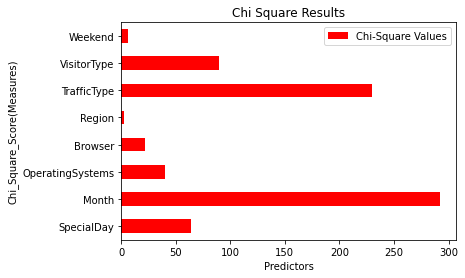

In [40]:
CHI_SQUARE_RESULTS.plot(x="Categorical Parameters",y="Chi-Square Values",kind="barh",color="red")
mlp.title("Chi Square Results")
mlp.ylabel("Chi_Square_Score(Measures)")
mlp.xlabel("Predictors")

**EDA of P-value Scores-**

Text(0.5, 0, 'Predictors')

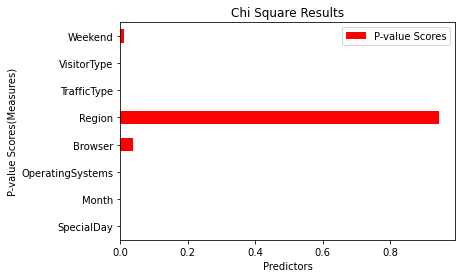

In [41]:
CHI_SQUARE_RESULTS.plot(x="Categorical Parameters",y="P-value Scores",kind="barh",color="red")
mlp.title("Chi Square Results")
mlp.ylabel("P-value Scores(Measures)")
mlp.xlabel("Predictors")

**Bivariate Analysis - Continuous Parameters using ANOVA -**

In [42]:
con

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [43]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [44]:
annova = []
x = 1

for i in con:
    a = anova_lm(ols("data[i] ~ Revenue",data=data).fit())
    annova.append(a)
    x = x + 1
    
annova

[               df        sum_sq      mean_sq           F        PR(>F)
 Revenue       1.0   1093.457124  1093.457124  152.540263  8.435438e-35
 Residual  10459.0  74973.438775     7.168318         NaN           NaN,
                df        sum_sq       mean_sq           F        PR(>F)
 Revenue       1.0  1.241570e+06  1.241570e+06  129.810346  6.763999e-30
 Residual  10459.0  1.000350e+08  9.564492e+03         NaN           NaN,
                df       sum_sq    mean_sq          F        PR(>F)
 Revenue       1.0    57.882299  57.882299  87.113975  1.232035e-20
 Residual  10459.0  6949.412797   0.664443        NaN           NaN,
                df        sum_sq        mean_sq        F        PR(>F)
 Revenue       1.0  1.973010e+05  197300.981606  76.9288  2.047684e-18
 Residual  10459.0  2.682443e+07    2564.721952      NaN           NaN,
                df        sum_sq        mean_sq           F        PR(>F)
 Revenue       1.0  1.707628e+05  170762.835146  227.110317  8.669927e

In [45]:
ANOVA_Results = {
    "Continuous Parameters" : ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues"],
    "ANOVA Scores" : ["8.435438e-35","6.763999e-30","1.232035e-20","2.047684e-18","8.669927e-51","3.742713e-61","3.766671e-36","1.047841e-84","0.0"]
}

In [46]:
ANOVA_Results = pd.DataFrame(data=ANOVA_Results)
ANOVA_Results["ANOVA Scores"] = ANOVA_Results["ANOVA Scores"].astype(float)
ANOVA_Results

,Continuous Parameters,ANOVA Scores
0,Administrative,8.435438e-35
1,Administrative_Duration,6.763999e-30
2,Informational,1.232035e-20
3,Informational_Duration,2.047684e-18
4,ProductRelated,8.669927e-51
5,ProductRelated_Duration,3.742713e-61
6,BounceRates,3.766671e-36
7,ExitRates,1.047841e-84
8,PageValues,0.000000e+00


In [47]:
ANOVA_Results[(ANOVA_Results["ANOVA Scores"]) > 0.05]

,Continuous Parameters,ANOVA Scores


In [48]:
ANOVA_Results[(ANOVA_Results["ANOVA Scores"]) < 0.05]

,Continuous Parameters,ANOVA Scores
0,Administrative,8.435438e-35
1,Administrative_Duration,6.763999e-30
2,Informational,1.232035e-20
3,Informational_Duration,2.047684e-18
4,ProductRelated,8.669927e-51
5,ProductRelated_Duration,3.742713e-61
6,BounceRates,3.766671e-36
7,ExitRates,1.047841e-84
8,PageValues,0.000000e+00


**EDA of ANNOVA Scores-**

Text(0.5, 0, 'Predictors')

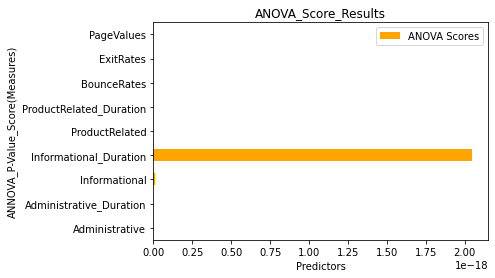

In [49]:
ANOVA_Results.plot(x="Continuous Parameters",y="ANOVA Scores",kind="barh",color="orange")
mlp.title("ANOVA_Score_Results")
mlp.ylabel("ANNOVA_P-Value_Score(Measures)")
mlp.xlabel("Predictors")

# ***6) Dropping unimportant columns for further model predictions-***

In [50]:
Y = data[["Revenue"]]
X = data.drop(columns=["Revenue","Region"],axis=0)

In [51]:
Y["Revenue"] = Y["Revenue"].replace({True: 1, False: 0})

In [52]:
Y

,Revenue
0,0
1,0
2,0
3,0
4,0
...,...
10456,0
10457,0
10458,0
10459,0


In [53]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,2,Returning_Visitor,False
1,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,4,Returning_Visitor,False
2,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,4,Returning_Visitor,True
3,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,3,Returning_Visitor,False
4,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,3,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,Returning_Visitor,True
10457,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,8,Returning_Visitor,True
10458,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,13,Returning_Visitor,True
10459,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,11,Returning_Visitor,False


In [54]:
xcat = []
xcon = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        xcat.append(i)
    else:
        xcon.append(i)
    

In [55]:
xcat

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [56]:
xcon

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

# ***7) Preprocessing of X and Y columns for further model predictions-***

In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler ()
data_stdX1 = pd.DataFrame(ss.fit_transform(X[xcon]),columns=xcon)

In [58]:
data_stdX1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.819204,-0.539915,2.116768,-0.370629
1,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.873439,1.717158,3.418352,-0.370629
2,-0.742854,-0.601424,-0.409613,-0.288759,-0.613509,-0.320914,0.362914,0.489788,-0.370629
3,-0.742854,-0.601424,-0.409613,-0.288759,-0.288765,-0.739427,0.172845,-0.337974,-0.370629
4,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.843079,-0.539915,2.116768,-0.370629
...,...,...,...,...,...,...,...,...,...
10456,0.369672,0.872246,-0.409613,-0.288759,0.938046,0.701566,-0.217476,-0.192547,0.780480
10457,-0.742854,-0.601424,-0.409613,-0.288759,-0.793922,-0.463946,-0.539915,-0.443014,-0.370629
10458,-0.742854,-0.601424,-0.409613,-0.288759,-0.757839,-0.712869,3.221874,1.682906,-0.370629
10459,0.740514,0.160819,-0.409613,-0.288759,-0.433095,-0.569838,-0.539915,-0.452148,-0.370629


*One hot encoding of Categorical columns-*

In [59]:
data_stdX2 = pd.get_dummies(X[xcat])

In [60]:
data_stdX2

,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Month_Aug,Month_Dec,Month_Feb,Month_Jul,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
10457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10458,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10459,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [61]:
data_stdX = data_stdX1.join(data_stdX2)

In [62]:
data_stdX

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_0.0,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.819204,-0.539915,2.116768,-0.370629,1,...,0,0,0,0,0,0,0,1,1,0
1,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.873439,1.717158,3.418352,-0.370629,1,...,0,0,0,0,0,0,0,1,1,0
2,-0.742854,-0.601424,-0.409613,-0.288759,-0.613509,-0.320914,0.362914,0.489788,-0.370629,1,...,0,0,0,0,0,0,0,1,0,1
3,-0.742854,-0.601424,-0.409613,-0.288759,-0.288765,-0.739427,0.172845,-0.337974,-0.370629,1,...,0,0,0,0,0,0,0,1,1,0
4,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.843079,-0.539915,2.116768,-0.370629,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,0.369672,0.872246,-0.409613,-0.288759,0.938046,0.701566,-0.217476,-0.192547,0.780480,1,...,0,0,0,0,0,0,0,1,0,1
10457,-0.742854,-0.601424,-0.409613,-0.288759,-0.793922,-0.463946,-0.539915,-0.443014,-0.370629,1,...,0,0,0,0,0,0,0,1,0,1
10458,-0.742854,-0.601424,-0.409613,-0.288759,-0.757839,-0.712869,3.221874,1.682906,-0.370629,1,...,0,0,0,0,0,0,0,1,0,1
10459,0.740514,0.160819,-0.409613,-0.288759,-0.433095,-0.569838,-0.539915,-0.452148,-0.370629,1,...,0,0,0,0,0,0,0,1,1,0


# ***8)Divide data in training & testing set-***

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data_stdX,Y,test_size=0.2,random_state=21)

In [64]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(8368, 71)
(8368, 1)
(2093, 71)
(2093, 1)


# ***MODEL PREDICTIONS-***

For this classification model, I am using 4 different models for further predictions-

1) Logistic Regression
2) KNN Classifier
3) Decision Tree Classifier
4) Random Forest Classifier

# ***9)  LOGISTIC REGRESSION MODEL FOR BINARY PREDICTIONS-***

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - LOGISTIC REGRESSION")
print("Predicted Value(Y) - REVENUE")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,3))
print("------------------------------------------------")

Model Type - LOGISTIC REGRESSION
Predicted Value(Y) - REVENUE
-----------------------------------------------
Training Data Accuracy Score -  0.899
Testing Data Accuracy Score -  0.894
------------------------------------------------


# ***10) K-Nearest Neighbour Classifier Model -***

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - KNN Classifier")
print("Predicted Value(Y) - REVENUE")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,3))
print("------------------------------------------------")

Model Type - KNN Classifier
Predicted Value(Y) - REVENUE
-----------------------------------------------
Training Data Accuracy Score -  1.0
Testing Data Accuracy Score -  0.859
------------------------------------------------


*GridSearch CV for best params-*

In [67]:
tg = {"n_neighbors" : range(0,50,1)}
knn = KNeighborsClassifier ()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knn,tg,scoring="accuracy",cv=10)
cvmodel = cv.fit(data_stdX,Y)
cvmodel.best_params_

{'n_neighbors': 25}

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
model = knn.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - KNN Classifier(n_neighbors=25)")
print("Predicted Value(Y) - REVENUE")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,3))
print("------------------------------------------------")

Model Type - KNN Classifier(n_neighbors=25)
Predicted Value(Y) - REVENUE
-----------------------------------------------
Training Data Accuracy Score -  0.897
Testing Data Accuracy Score -  0.893
------------------------------------------------


# ***11) Decision Tree Classifier Model-***

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (random_state=21)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier")
print("Predicted Value(Y) - REVENUE")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier
Predicted Value(Y) - REVENUE
-----------------------------------------------
Training Data Accuracy Score -  1.0
Testing Data Accuracy Score -  0.87
------------------------------------------------


For Decision Tree, we are using three Post-pruning Factors-

1) Max-Depth
2) Min Samples Split
3) Min Samples Leaf Nodes

*Max_Depth-*

In [70]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

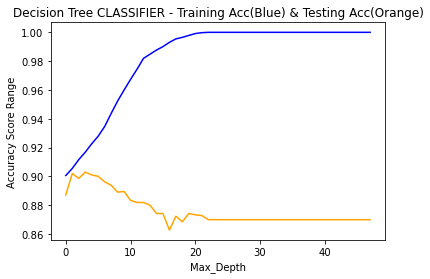

In [71]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree CLASSIFIER - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Max_Depth")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-(Max_depth)*

In [72]:
tg = {"max_depth":range(2,50,1),}
dtc = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=10)
cvmodel = cv.fit(data_stdX,Y)
cvmodel.best_params_

{'max_depth': 3}

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (random_state=21,max_depth=3)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier (Max_Depth=3)")
print("Predicted Value(Y) - REVENUE")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier (Max_Depth=3)
Predicted Value(Y) - REVENUE
-----------------------------------------------
Training Data Accuracy Score -  0.906
Testing Data Accuracy Score -  0.9021
------------------------------------------------


*Min_Samples_Split -*

In [74]:
tr = []
ts = []
for i in range(2,500,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

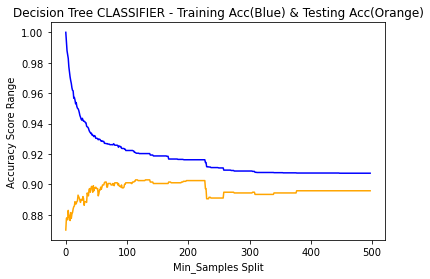

In [75]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree CLASSIFIER - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Min_Samples Split")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-(Min_Samples_Split)*

In [76]:
tg = {"min_samples_split": range(2,500,1)}
dtc = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=10)
cvmodel = cv.fit(data_stdX,Y)
cvmodel.best_params_

{'min_samples_split': 190}

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (random_state=21,min_samples_split=190)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier (Min Samples Split=190)")
print("Predicted Value(Y) -  REVENUE")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier (Min Samples Split=190)
Predicted Value(Y) -  REVENUE
-----------------------------------------------
Training Data Accuracy Score -  0.916
Testing Data Accuracy Score -  0.9011
------------------------------------------------


*Min_Leaf_Nodes-*

In [78]:
tr = []
ts = []
for i in range(2,50,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

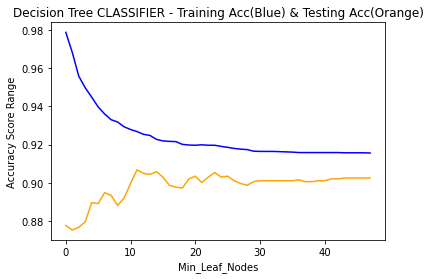

In [79]:
mlp.plot(tr,c="blue")
mlp.plot(ts,c="orange")
mlp.title("Decision Tree CLASSIFIER - Training Acc(Blue) & Testing Acc(Orange)")
mlp.xlabel("Min_Leaf_Nodes")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-(Min_Samples_Leaf)*

In [80]:
tg = {"min_samples_leaf":range(2,100,1),
     }
dtc = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=10)
cvmodel = cv.fit(data_stdX,Y)
cvmodel.best_params_

{'min_samples_leaf': 98}

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (random_state=21,min_samples_leaf=98)
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Decision Tree Classifier (Min Samples Leaf=98)")
print("Predicted Value(Y) - REVENUE")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Decision Tree Classifier (Min Samples Leaf=98)
Predicted Value(Y) - REVENUE
-----------------------------------------------
Training Data Accuracy Score -  0.913
Testing Data Accuracy Score -  0.9021
------------------------------------------------


In [82]:
DecisionTree_Results = {"DT Factors" : ["Max Depth","Min Samples Split","Min Samples Leaf"],
                        "Values" : ["3","190","98"],
                        "Training Accuracy Score" : ["0.906","0.916","0.913"],
                        "Testing Accuracy Score" : ["0.9021","0.9011","0.9021"]
                       }

In [83]:
Decision_Tree_Scores = pd.DataFrame(data=DecisionTree_Results)

In [84]:
Decision_Tree_Scores

,DT Factors,Values,Training Accuracy Score,Testing Accuracy Score
0,Max Depth,3,0.906,0.9021
1,Min Samples Split,190,0.916,0.9011
2,Min Samples Leaf,98,0.913,0.9021


# ***12) Random Forest Classifier Model-***

In [85]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier (n_estimators=100,random_state=21,max_depth=i)
    model = rfc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

Text(0, 0.5, 'Accuracy Score Range')

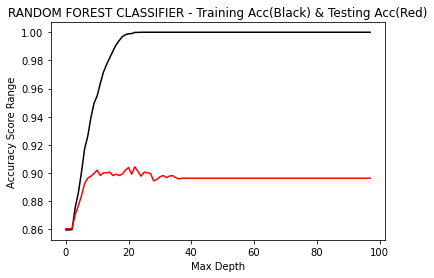

In [86]:
mlp.plot(tr,c="black")
mlp.plot(ts,c="red")
mlp.title("RANDOM FOREST CLASSIFIER - Training Acc(Black) & Testing Acc(Red)")
mlp.xlabel("Max Depth")
mlp.ylabel("Accuracy Score Range")

*GridSearch CV for best params-*

In [87]:
tg = {"max_depth": range(0,50,1)}
rfc = RandomForestClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=10)
cvmodel = cv.fit(data_stdX,Y)
cvmodel.best_params_

{'max_depth': 12}

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=21,max_depth=12)
model = rfc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

print("Model Type - Random Forest Classifier")
print("Predicted Value(Y) - ATTRITION")
print("-----------------------------------------------")
print("Training Data Accuracy Score - ",round(tr_acc,3))
print("Testing Data Accuracy Score - ",round(ts_acc,4))
print("------------------------------------------------")

Model Type - Random Forest Classifier
Predicted Value(Y) - ATTRITION
-----------------------------------------------
Training Data Accuracy Score -  0.955
Testing Data Accuracy Score -  0.9021
------------------------------------------------


# ***13) Feature Importance of Parameters-***

In [89]:
rfc = RandomForestClassifier(n_estimators=100,random_state=21,max_depth=12)
rfc.fit(data_stdX,Y)
rfc.feature_importances_

array([3.56736057e-02, 4.40960913e-02, 1.33139058e-02, 2.27633857e-02,
       5.91491149e-02, 6.96888155e-02, 3.91139604e-02, 6.55349628e-02,
       4.68237398e-01, 2.94549926e-03, 7.26524420e-04, 6.86959447e-04,
       1.22204457e-03, 9.24367596e-04, 5.81763212e-04, 2.76285415e-03,
       4.74719964e-03, 3.38719315e-04, 3.09347424e-03, 1.67480389e-03,
       4.92158055e-03, 6.56413899e-03, 2.36563268e-02, 4.09761920e-03,
       3.77520716e-03, 4.73911555e-03, 6.02918326e-03, 5.40027039e-03,
       2.42834292e-03, 1.95081890e-04, 3.68016270e-04, 0.00000000e+00,
       5.24909167e-04, 5.04570044e-03, 6.28573271e-03, 5.33040528e-04,
       4.36602263e-03, 2.67402548e-03, 1.42593813e-03, 9.10013222e-04,
       1.26344813e-03, 4.06963855e-08, 1.48926676e-03, 1.01192660e-04,
       7.45548609e-04, 2.82915765e-04, 4.44574776e-03, 7.78732944e-03,
       4.36720743e-03, 3.93030357e-03, 2.90082436e-03, 2.45336920e-03,
       7.99846727e-04, 3.73591464e-03, 2.06018091e-04, 3.20016627e-03,
      

In [90]:
pd.set_option("display.max_rows",200)
Important_Parameters = pd.DataFrame([data_stdX.columns,rfc.feature_importances_]).T
Important_Parameters.columns = ["Column_Name","Importance"]
Important_Parameters.sort_values(by="Importance",ascending=False)

,Column_Name,Importance
8,PageValues,0.468237
5,ProductRelated_Duration,0.069689
7,ExitRates,0.065535
4,ProductRelated,0.059149
1,Administrative_Duration,0.044096
6,BounceRates,0.039114
0,Administrative,0.035674
22,Month_Nov,0.023656
3,Informational_Duration,0.022763
2,Informational,0.013314


# ***14) Overall Models Score Comparison-***

In [91]:
models= {
    "Models": ["Logistic Regression","KNN Classifier","Decision Tree Classifier","Random Forest Classifier"],
    "Training Accuracy Score": ["0.899","0.897","0.913","0.955"],
    "Testing Accuracy Score": ["0.894","0.893","0.9021","0.9021"]
}

In [92]:
Overall_Model_Comparison = pd.DataFrame(data=models)
Overall_Model_Comparison["Training Accuracy Score"] = Overall_Model_Comparison["Training Accuracy Score"].astype(float)
Overall_Model_Comparison["Testing Accuracy Score"] = Overall_Model_Comparison["Testing Accuracy Score"].astype(float)

In [93]:
Overall_Model_Comparison

,Models,Training Accuracy Score,Testing Accuracy Score
0,Logistic Regression,0.899,0.8940
1,KNN Classifier,0.897,0.8930
2,Decision Tree Classifier,0.913,0.9021
3,Random Forest Classifier,0.955,0.9021


Text(0.5, 1.0, 'Comparison of Training Accuracy Scores in various Models')

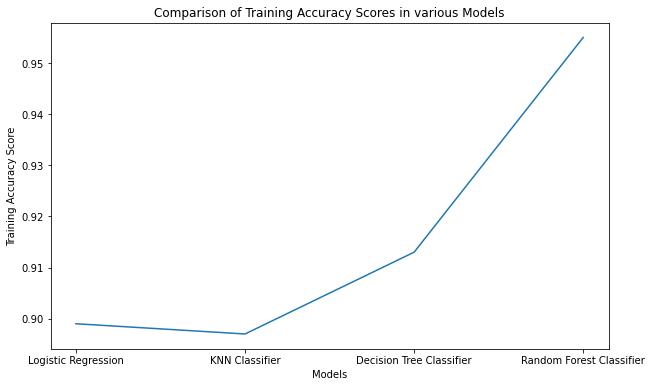

In [94]:
mlp.figure(figsize=(10,6))
sb.lineplot(Overall_Model_Comparison["Models"],Overall_Model_Comparison["Training Accuracy Score"])
mlp.title("Comparison of Training Accuracy Scores in various Models")

Text(0.5, 1.0, 'Comparison of Testing Accuracy Scores in various Models')

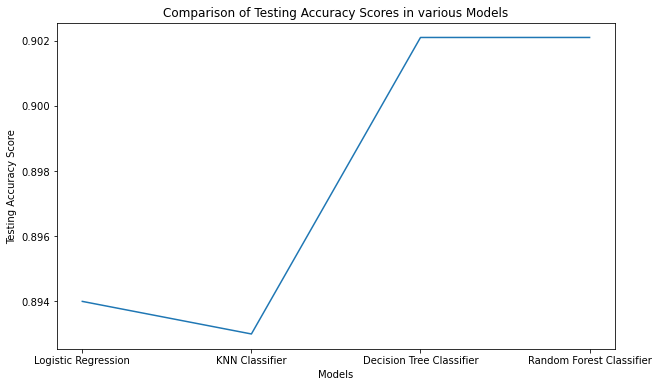

In [95]:
mlp.figure(figsize=(10,6))
sb.lineplot(Overall_Model_Comparison["Models"],Overall_Model_Comparison["Testing Accuracy Score"])
mlp.title("Comparison of Testing Accuracy Scores in various Models")

# ***15) Applying the above model algorithms to testing data to idenitfy the predicted values -***

In [96]:
data_stdX.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_0.0,...,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.819204,-0.539915,2.116768,-0.370629,1,...,0,0,0,0,0,0,0,1,1,0
1,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.873439,1.717158,3.418352,-0.370629,1,...,0,0,0,0,0,0,0,1,1,0
2,-0.742854,-0.601424,-0.409613,-0.288759,-0.613509,-0.320914,0.362914,0.489788,-0.370629,1,...,0,0,0,0,0,0,0,1,0,1
3,-0.742854,-0.601424,-0.409613,-0.288759,-0.288765,-0.739427,0.172845,-0.337974,-0.370629,1,...,0,0,0,0,0,0,0,1,1,0
4,-0.742854,-0.601424,-0.409613,-0.288759,-0.902170,-0.843079,-0.539915,2.116768,-0.370629,0,...,0,0,0,0,0,0,0,1,1,0


In [97]:
data_stdX_Final = data_stdX[xtrain.columns]

In [98]:
model.predict(data_stdX_Final)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
Final_Predicted_Model = pd.DataFrame(data[["Revenue"]])
Final_Predicted_Model["Predicted_Revenue"] = model.predict(data_stdX_Final)
Final_Predicted_Model["Predicted_Revenue"] = Final_Predicted_Model["Predicted_Revenue"].astype(int)
Final_Predicted_Model["Predicted_Revenue"] = Final_Predicted_Model["Predicted_Revenue"].replace({1:True, 0:False})

In [133]:
Final_Predicted_Model

,Revenue,Predicted_Revenue
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10456,False,False
10457,False,False
10458,False,False
10459,False,False


# ***16) Overall Model Score for Test Unseen Data -***

In [122]:
model.score(xtest,ytest)
print("Overall Model Accuracy Score for Unseen Data",round(model.score(xtest,ytest),4))

Overall Model Accuracy Score for Unseen Data 0.9021


# ***17) Confusion Matrix -***

In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain,tr_pred)

array([[7182,   11],
       [ 367,  808]], dtype=int64)

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ts_pred)

array([[1767,   34],
       [ 171,  121]], dtype=int64)

# ***18) Classification Report -***

In [160]:
from sklearn.metrics import classification_report
print(classification_report(ytrain,tr_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7193
           1       0.99      0.69      0.81      1175

    accuracy                           0.95      8368
   macro avg       0.97      0.84      0.89      8368
weighted avg       0.96      0.95      0.95      8368



In [161]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1801
           1       0.78      0.41      0.54       292

    accuracy                           0.90      2093
   macro avg       0.85      0.70      0.74      2093
weighted avg       0.89      0.90      0.89      2093



# ***19) Comparison of both Actual and Predicted using Data Visualization-***

In [120]:
Final_Predicted_Model["Revenue"].value_counts()

False    8994
True     1467
Name: Revenue, dtype: int64

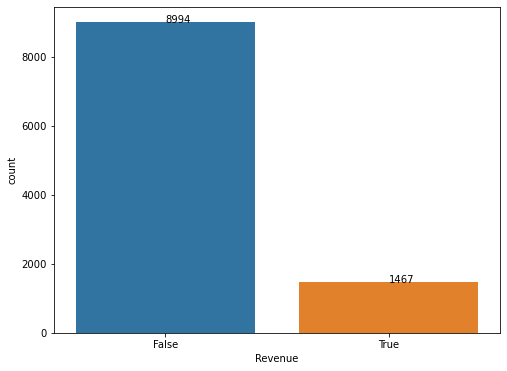

In [151]:
mlp.figure(figsize=(8,6))
sb.countplot(Final_Predicted_Model["Revenue"])
for count in [False,True]:
    mlp.text(count, (Final_Predicted_Model["Revenue"] == count).sum(),(Final_Predicted_Model["Revenue"] == count).sum());

In [121]:
Final_Predicted_Model["Predicted_Revenue"].value_counts()

False    9487
True      974
Name: Predicted_Revenue, dtype: int64

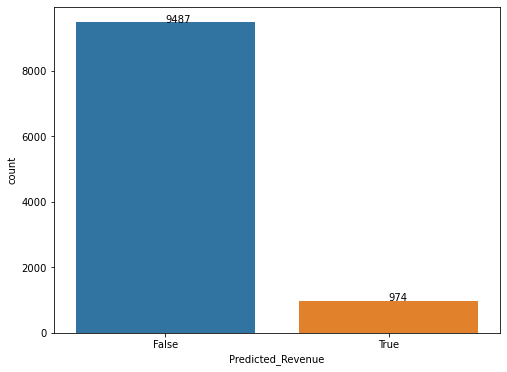

In [153]:
mlp.figure(figsize=(8,6))
sb.countplot(Final_Predicted_Model["Predicted_Revenue"])
for count in [False,True]:
    mlp.text(count, (Final_Predicted_Model["Predicted_Revenue"] == count).sum(),(Final_Predicted_Model["Predicted_Revenue"] == count).sum());

# Conclusion

So from the above problem statement and after implementing various ML models on this dataset, we were able to identify that - 
1) Before Prediction - 8994 "False" and 1467 "True" customers intention were identified as Revenue Generation for Online Shoppers.
2) After Prediction  - 9487 "False" and 974 "True" customers intention were actually predicted as Revenue Generation for Online Shoppers.

So, the predicted additional 493 customers intention as "False" needs to be identified why their intention shifted from Yes to No during purchasing a particular product from a online website.